## Medidas de disperción en _**python**_
--------------

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

df = pd.read_csv('./resources/cars.csv')
df.sample(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
14448,Renault,19,mechanical,green,398000,1994,gasoline,False,gasoline,1.7,...,False,False,False,False,False,False,False,False,True,156
38119,Peugeot,405,mechanical,silver,20000,1990,diesel,False,diesel,1.9,...,False,False,False,False,False,False,False,False,False,92


In [63]:
# Desviación Estándar
df['price_usd'].std()

6428.1520182029035

In [64]:
df['price_usd'].max() - df['price_usd'].min()

49999.0

In [67]:
df['price_usd'].median()

4800.0

In [94]:
class Percentiles:
    def __init__(self, min=0, max=1, jumpby=0.25):
        self.jumpby = jumpby
        if min >= 0:
            self.min = min
        else:
            print("Tiene que ser mayor o igual que cero")
            raise ValueError
        if max <= 1:
            self.max = max
        else:
            print("Tiene que ser menor o igual que 1")
            raise ValueError
    def __iter__(self):
        self.counter = self.min
        return self
    def __next__(self):
        if self.counter <= self.max:
            y = self.counter
            self.counter += self.jumpby
            return round(y, 2)
        else:
            raise StopIteration

In [105]:
def run():
    op = int(input("""
    1. Percentiles
    2. Cuartiles
    """))
    if op == 1:
        iterator = Percentiles(jumpby=0.01)
    elif op == 2:
        iterator = Percentiles(jumpby=0.25)
    else:
        print('Inserta una opción válida')
        run()
    for i in iterator:
        print(df['price_usd'].quantile(q=i))
        
run()

1.0
2100.0
4800.0
8990.0
50000.0


### Límites para detección de outliers (datos simetricamente distribuidos)

Datos entre $$Q_1 -1.5 \times \text{IQR}$$ y $$Q_3 + 1.5 \times \text{IQR}$$

In [106]:
q3 = df['price_usd'].quantile(q=0.75)
q1 = df['price_usd'].quantile(q=0.25)

iqr = q3-q1
min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr

print(min_limit, "\n", max_limit)

-8235.0 
 19325.0


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

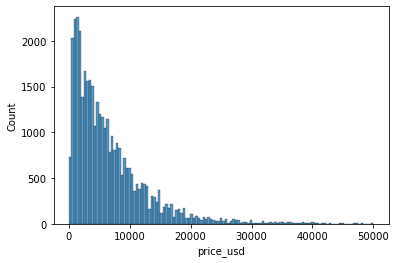

In [23]:
sns.histplot(data = df, x = 'price_usd')

<AxesSubplot:xlabel='year_produced', ylabel='price_usd'>

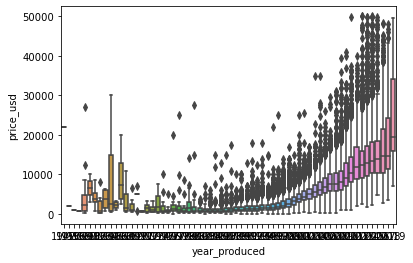

In [17]:
sns.boxplot( x = 'year_produced', y = 'price_usd', data = df)

C:\Users\Cesar\.conda\envs\data_science\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


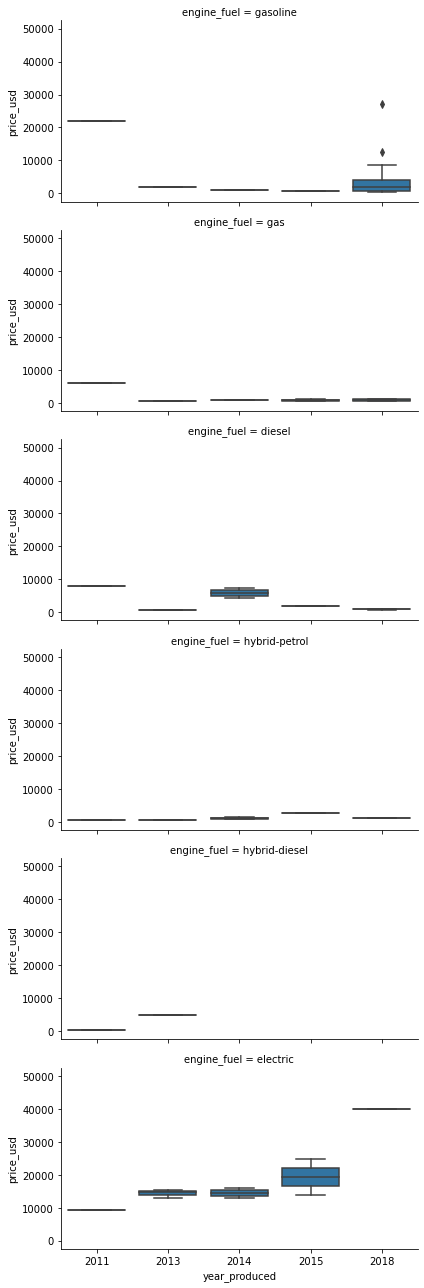

In [23]:
g = sns.FacetGrid(data = df, row ='engine_fuel', height=3, aspect = 2)
g.map(sns.boxplot, 'year_produced', 'price_usd')

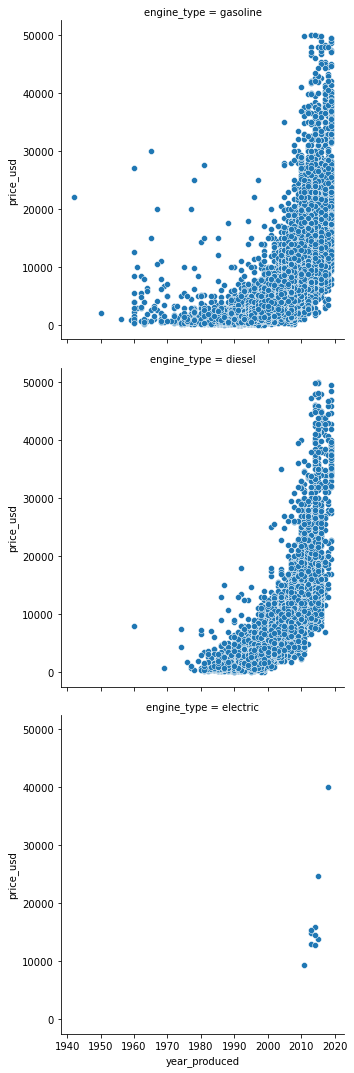

In [15]:
sns.relplot(
    data=df, y="price_usd", x='year_produced',
    row="engine_type",
    kind="scatter"
)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385